# TP2 - SVM

### 1. Plan séparateur

In [1]:
import matplotlib.pyplot as plt
import numpy as np

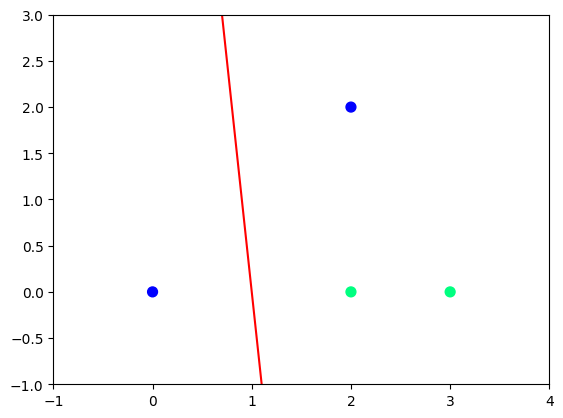

In [2]:
from TP2_ETU import aff_donnees, aff_plan


X = np.array([[0, 0],[2, 2],[2, 0],[3, 0]])
y = np.array([-1, -1, 1, 1])

boundx = [X[:,0].min() - 1, X[:,0].max() + 1]
boundy = [X[:,1].min() - 1, X[:,1].max() + 1]

# visualize data and decision boundary
aff_donnees(X, y, boundx, boundy, 50)
aff_plan([1,0.1], -1, boundx)

Cet hyperplan n'est pas séparateur.

### 2. SVM linéaire dans le primal

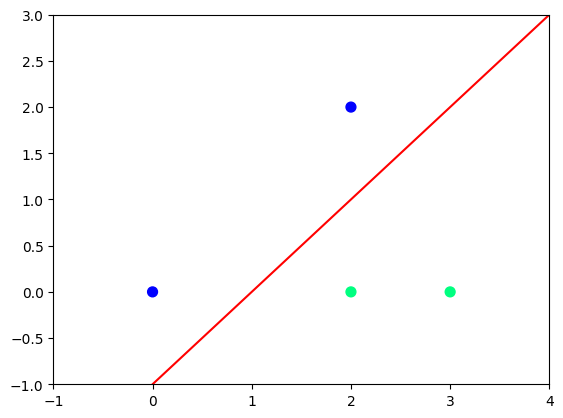

In [3]:
from TP2_ETU import Resoud_primal

w,b = Resoud_primal(X, y)

aff_donnees(X, y, boundx, boundy, 50)
aff_plan(w, b, boundx)

Cette fois l'hyperplan sépare bel et bien ces 4 points, et la marge est maximale.

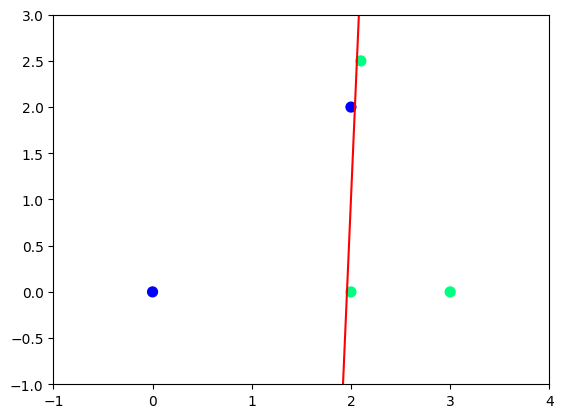

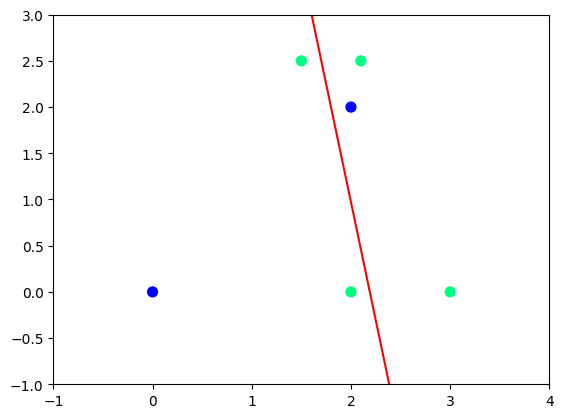

In [4]:
from TP2_ETU import Resoud_primal

X_bis = np.concatenate((X, [[2.1, 2.5]]), axis = 0)
y_bis = np.concatenate((y, [1]), axis = 0)

X_ter = np.concatenate((X_bis, [[1.5, 2.5]]), axis = 0)
y_ter = np.concatenate((y_bis, [1]), axis = 0)

# Resolve and show results
w, b = Resoud_primal(X, y)
plt.figure()
w,b = Resoud_primal(X_bis, y_bis)
aff_donnees(X_bis, y_bis, boundx, boundy, 50)
aff_plan(w, b, boundx)

w, b = Resoud_primal(X_ter, y_ter)
plt.figure()
aff_donnees(X_ter, y_ter, boundx, boundy, 50)
aff_plan(w, b, boundx)

plt.show()


On constate cependant qu'en ajoutant le point `(2.1, 2.5)` le plan obtenu sépare toujours les deux classes, mais avec une marge très faible.  
Lorsque l'on ajoute aussi le point `(1.5, 2.5)` le plan n'est plus séparateur.  
De plus, on constate que la discrimination à même empirée, avec le point `(2, 0)` dorénavant mal classé.

### 3. SVM à marge souple dans le primal

C=0.1: w=[[ 0.29999983]
 [-0.19999997]], b=-0.39655311137851734
C=1: w=[[ 0.99936231]
 [-0.99936231]], b=-1.000000000006933
C=10: w=[[ 1.00000003]
 [-1.00000005]], b=-1.0000000424093227
C=100: w=[[ 1.00000011]
 [-1.0000002 ]], b=-1.000000144331195


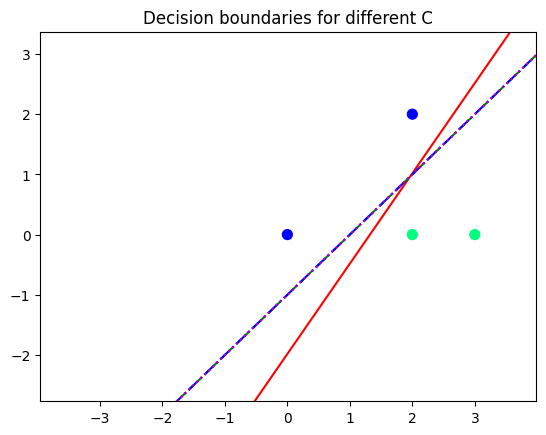

C=0.1: w=[[0.21000164]
 [0.04999545]], b=0.40391094017206913
C=1: w=[[ 0.99999947]
 [-0.03999996]], b=-0.9999999244454212
C=10: w=[[ 1.00002156]
 [-0.04000087]], b=-1.00004311418582
C=100: w=[[ 7.987225  ]
 [-0.31948922]], b=-14.974449686643805


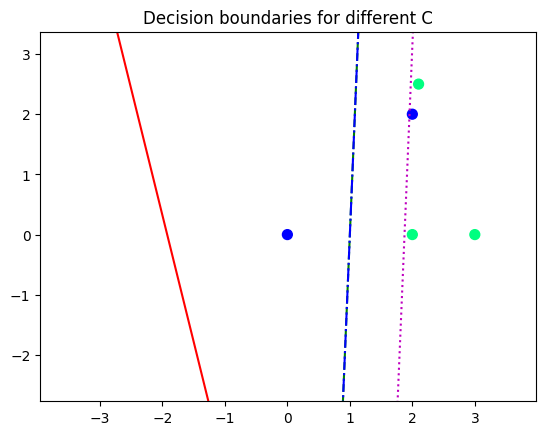

C=0.1: w=[[0.15000048]
 [0.04999926]], b=0.6138472413666635
C=1: w=[[0.9999996 ]
 [0.20000004]], b=-0.9999998144135195
C=10: w=[[1.        ]
 [0.19999998]], b=-1.000000001211443
C=100: w=[[1. ]
 [0.2]], b=-1.0000000007897833


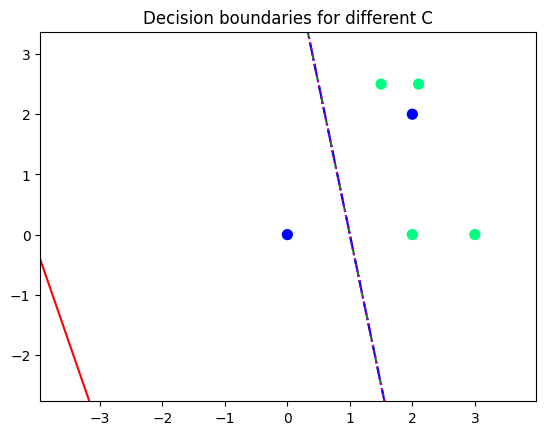

In [10]:
from TP2_ETU import Resoud_primal_souple, aff_donnees, aff_plan

# datasets
datasets = [(X, y), (X_bis, y_bis), (X_ter, y_ter)]

# C values to test
C_values = [0.1, 1, 10, 100]

# Colors or linestyles for different C
colors = ['r', 'g', 'b', 'm']
linestyles = ['-', '--', '-.', ':']

for ds in datasets:
    plt.figure()
    aff_donnees(ds[0], ds[1], boundx, boundy, 50)
    for i, c in enumerate(C_values):
        w, b = Resoud_primal_souple(ds[0], ds[1], c)
        # pick color and linestyle cyclically
        color = colors[i % len(colors)]
        ls = linestyles[i % len(linestyles)]
        aff_plan(w, b, boundx, color=color, linestyle=ls)
        print(f"C={c}: w={w}, b={b}")
    plt.title("Decision boundaries for different C")
    plt.show()


TODO: conclusion sur le rôle de C


### 4. SVM dans le dual

In [11]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=1)
model.fit(X, y)

print(model.dual_coef_)
print()
print(model.support_vectors_)
print()
print(model.support_)


[[-0.5 -0.5  1. ]]

[[0. 0.]
 [2. 2.]
 [2. 0.]]

[0 1 2]


TODO: comprendre la question

### 5. SVM avec Kernel
TODO: expliquer le fonctionnement de affiche frontière (I guess it predicts points in a grid like pattern to paint areas according to model's prediction)

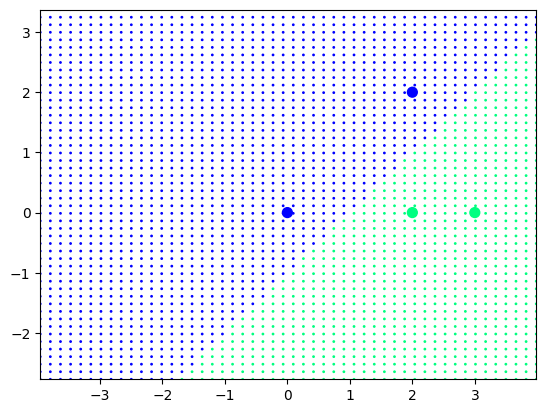

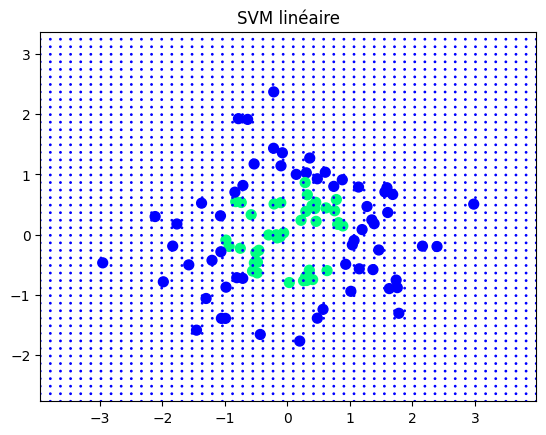

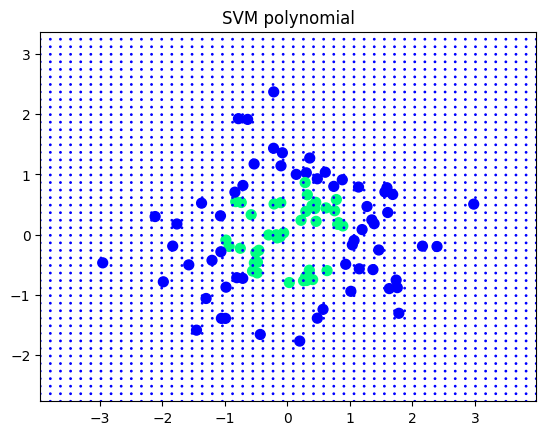

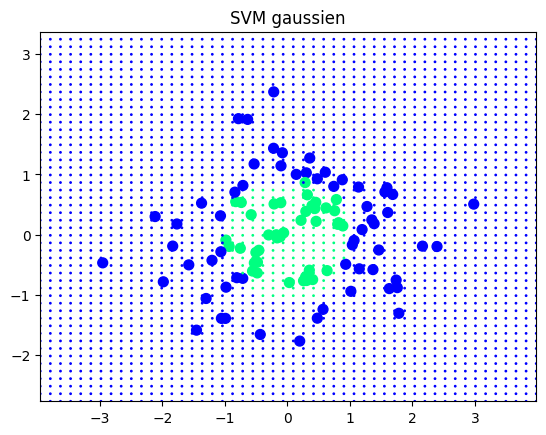

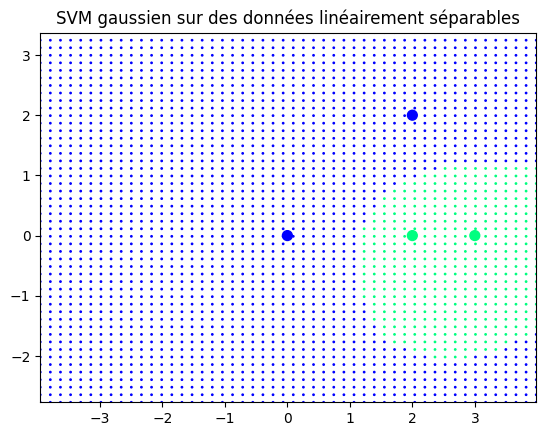

In [18]:
from TP2_ETU import aff_frontiere
aff_frontiere(X, y, boundx, boundy, model)

# Load data
data = np.load("TP2.npz")
X_train, y_train = (data[key] for key in ["arr_0", "arr_1"])
boundx = [X_train[:,0].min() - 1, X_train[:,0].max() + 1]
boundy = [X_train[:,1].min() - 1, X_train[:,1].max() + 1]


model_lin = svm.SVC(kernel='linear', C=1)
model_lin.fit(X_train, y_train)
plt.figure()
plt.title("SVM linéaire")
aff_frontiere(X_train, y_train, boundx, boundy, model_lin)

model_poly = svm.SVC(kernel='poly', C=1)
model_poly.fit(X_train, y_train)
plt.figure()
plt.title("SVM polynomial")
aff_frontiere(X_train, y_train, boundx, boundy, model_poly)

model_gaus = svm.SVC(kernel='rbf', C=1)
model_gaus.fit(X_train, y_train)
plt.figure()
plt.title("SVM gaussien")
aff_frontiere(X_train, y_train, boundx, boundy, model_gaus)

# model_sig = svm.SVC(kernel='sigmoid', C=1)
# model_sig.fit(X_train, y_train)
# plt.figure()
# plt.title("SVM sigmoid")
# aff_frontiere(X_train, y_train, boundx, boundy, model_sig)

model_gaus_bis = svm.SVC(kernel='rbf', C=1)
model_gaus_bis.fit(X, y)
plt.figure()
plt.title("SVM gaussien sur des données linéairement séparables")
aff_frontiere(X, y, boundx, boundy, model_gaus_bis)


On remarque qu'il n'est pas possible d'apprendre une frontière non-linéaire avec un noyau linéaire.  
Le noyaux gaussien est de loin celui avec un meilleur résultat dans ce cas.
Cependant on voit que lorsque les classes sont linéairement séparable, ce n'est pas un bon classifier. 
TODO: mieux formuler.